In [106]:
title = "ogs@jupyter-lab: Use Case Deep Geological Repository (AREHS)"
variables = ['pressure', 'salinity']
variable = "pressure"

# Salt Dom Benchmarks of Use Case Deep Geological Repository  (AREHS)

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [65]:
import multiprocessing
from ogs6py import ogs
#start ogs in background
print("===============")
print(">>> start ogs <<<")
# OGS_PATH = "/path/to/directory/of/either/ogs.exe/or/singularity"
# if ogs is run from a singularity container, the OGS_PATH should
# direct to location of singularity
OGS_PATH = "/usr/bin/"
# CONTAINER_PATH = "path/to/.sif"
# only required, if ogs is run from a container
CONTAINER_PATH = "/home/bathmann/Documents/UFZ/code/dgr/container/images/ogs-dgr_v0.3.sif"
# PROJECT_FILE = "relative/or/absolute/path/to/project/file"
PROJECT_FILE = "salt_dom_HC-04.prj"

# model creation using ogs6py
model = ogs.OGS(PROJECT_FILE=PROJECT_FILE)
# listing model as process for parallel processing
ogs_process = multiprocessing.Process(
    target=model.run_model,
    kwargs={"path":OGS_PATH, "container_path":CONTAINER_PATH,"LOGFILE":"example.log"})
# start of ogs in background
ogs_process.start()
print(">>> ogs is running in background <<<")

>>> start ogs <<<
>>> ogs is running in background <<<


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

***Definition of required methods***

In [107]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import os
import re

# Data extraction
def triangulate(vtu_file, array="salinity"):
    m_plot = vtuIO.VTUIO(vtu_file, dim=2)
    triang = tri.Triangulation(m_plot.points[:,0],m_plot.points[:,1])
    salinity_data = m_plot.get_point_field(array)
    return triang, salinity_data


# Data to figure
def update_figure(triang, data):
    for ax_i, triang_i, data_i in zip(ax, triang, data):
        ax_i.clear()
        contour_i = ax_i.tricontourf(triang_i, data_i)
        plt.colorbar(contour_i, ax=ax_i)

# Update available simulation results
def explore_and_sort_files():
    files = os.listdir()
    times = {}
    pattern = "arehs-salt-HC_04_ts"
    for file in files[::-1]:
        if pattern in file:
            [timestep, time_i] = [float(s) for s in re.findall(r'-?\d+\.?\d*', file.replace(pattern,""))]
            times[timestep] = time_i
    timesteps = sorted(times)
    return times, timesteps

# Update filename
def filename_update(timestep):
    global vtu_file
    vtu_file = "arehs-salt-HC_04_ts_" 
    vtu_file += str(int(timestep))
    vtu_file += "_t_"
    vtu_file += "%2.6f"%times[timestep]
    vtu_file += str(".vtu")
        

***Readout of prepared simulation results***

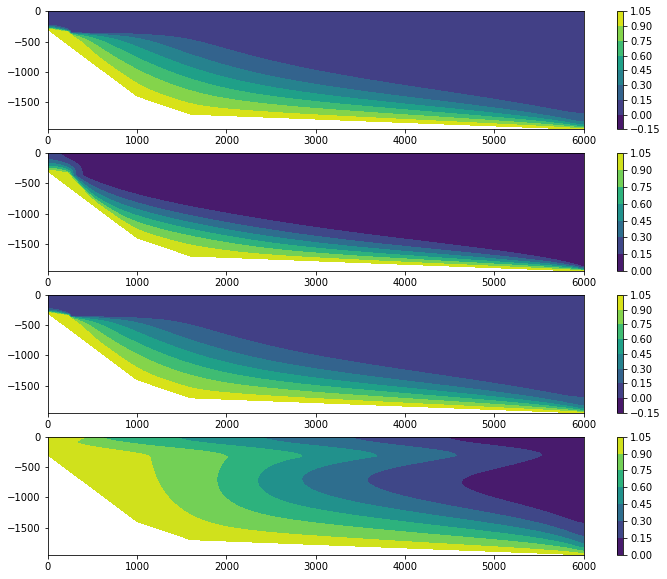

In [115]:
# Read, save and visualization of results
vtu_file_hc_01 = "arehs-salt-HC_01_ts_3625_t_31536000000.000000.vtu"
triang_hc_01, salinity_hc_01 = triangulate(vtu_file_hc_01)
vtu_file_hc_02 = "arehs-salt-HC_02_ts_2126_t_31536000000.000000.vtu"
triang_hc_02, salinity_hc_02 = triangulate(vtu_file_hc_02)
vtu_file_hc_03 = "arehs-salt-HC_03_ts_3806_t_31536000000.000000.vtu"
triang_hc_03, salinity_hc_03 = triangulate(vtu_file_hc_03)
vtu_file_hc_04 = "arehs-salt-HC_04_ts_8782_t_31536000000.000000.vtu"
triang_hc_04, salinity_hc_04 = triangulate(vtu_file_hc_04)

result_data = [salinity_hc_01, salinity_hc_02, salinity_hc_03, salinity_hc_04]
result_triang = [triang_hc_01, triang_hc_02, triang_hc_03, triang_hc_04]

fig, ax = plt.subplots(nrows=4, figsize=(12,10), num=1)
update_figure(result_triang, result_data)

***Visualization and comparison of prepared results***

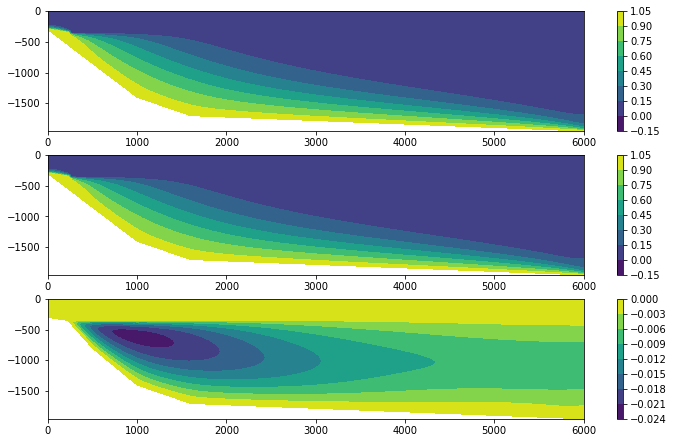

In [116]:
# Preparation of 2 datasets for comparison
compare_data = [salinity_hc_01, salinity_hc_03]
compare_triang = [triang_hc_01, triang_hc_03]

# Calculation of difference
compare_data.append(compare_data[1] - compare_data[0])
compare_triang.append(compare_triang[0])

# Plot of Dataset 1, Dataset 2 and their difference
fig, ax = plt.subplots(nrows=3, figsize=(12,7.5), num=1)
update_figure(compare_triang, compare_data)

***List of results***

In [117]:
# This line can be called to list the available simulation results
# With progressing time, the list will enlarge
times, timesteps = explore_and_sort_files()
for step in timesteps: print(int(step))

0
100
200
300
316
400
500
600
700
800
900
1000
1100
1200
8782


***Selection of results to be visualized***

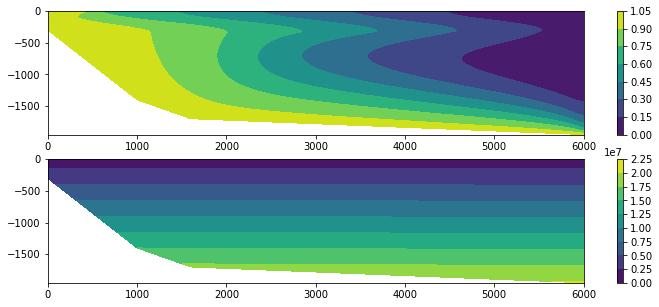

In [118]:
# Choose one of the listed timesteps to be displayed
timestep = 8782

# Show data from choosen timestep
fig, ax = plt.subplots(nrows=2, figsize=(12,5), num=1)
filename_update(timestep)
triang_i, salinity_i = triangulate(vtu_file)
triang_i, pressure_i = triangulate(vtu_file, array="pressure")
update_figure([triang_i, triang_i], [salinity_i, pressure_i])

**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/hydro-component/elder/
- project file: elder-python.prj
- notebook compilation by OK (https://github.com/OlafKolditz/ogs-jupyter-lab)

**Credits**
- Jasper Bathmann for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (JOSS review pending) https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc
